In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(X_train, y_train) , (X_test, y_test) = datasets.mnist.load_data()

In [ ]:
tf.test.is_built_with_cuda()

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
len(X_train)

60000

In [26]:
type(X_train)

numpy.ndarray

In [44]:
X_train.shape

(60000, 28, 28)

In [22]:
len(X_train[0])

28

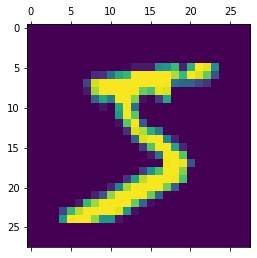

In [10]:
plt.matshow(X_train[0])

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [51]:
X_train_flattened = X_train.reshape(len(X_train), 28,28,1)
X_train_flattened.shape

(60000, 28, 28, 1)

In [52]:
X_test_flattened = X_test.reshape(len(X_test), 28,28,1)
X_test_flattened.shape

(10000, 28, 28, 1)

In [41]:
sd = np.array([[[1,3,4,3],[1,3,434,33],[23,2,2,2]]])
sd = sd.reshape(1, 12)
sd


array([[  1,   3,   4,   3,   1,   3, 434,  33,  23,   2,   2,   2]])

In [42]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [43]:
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
cnn = models.Sequential([
    layers.Conv2D(filters=50, kernel_size = (3,3), activation="relu", input_shape= (28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=50, kernel_size = (3,3), activation="relu", input_shape= (28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=50, kernel_size = (3,3), activation="relu", input_shape= (28,28)),
    layers.MaxPooling2D((2,2)),
    
    
    
        layers.Flatten(),
         layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')  
    
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cnn.fit(X_train_flattened, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0117 - accuracy: 0.9978
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0091 - accuracy: 0.9977
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0094 - accuracy: 0.9977
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0089 - accuracy: 0.9980
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0091 - accuracy: 0.9982
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0080 - accuracy: 0.9982
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0104 - accuracy: 0.9977
Epoch 8/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0062 - accuracy: 0.9984
Epoch 9/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0084 - accuracy: 0.9981
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.006

In [55]:
%%timeit -n1 -r1
with tf.device('/CPU:5'):
    cnn.fit(X_train_flattened, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0159 - accuracy: 0.9954
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0145 - accuracy: 0.9955
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0136 - accuracy: 0.9959
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0155 - accuracy: 0.9961
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0143 - accuracy: 0.9963
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0136 - accuracy: 0.9961
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0120 - accuracy: 0.9965
Epoch 8/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0168 - accuracy: 0.9955
Epoch 9/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0110 - accuracy: 0.9971
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.013

In [58]:
tf.test.is_built_with_cuda()

True

In [59]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1374 - accuracy: 0.9876


[0.13736313581466675, 0.9876000285148621]

In [64]:
y_pred = cnn.predict(X_test)

In [67]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes

[7, 2, 1, 0, 4]

In [68]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

